In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt


In [4]:
import seaborn as sns


In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
import tensorflow as ts

In [7]:
from tensorflow.keras.models import Sequential

In [8]:
df=pd.read_csv(r"D:\Advance ML\ANN Project\ANN Project\Dataset\concrete_data.csv")

In [9]:
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [10]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [11]:
df.shape

(1030, 9)

# NaN

In [12]:
df.isna().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

# Error detection

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Cement'),
  Text(1, 0, 'Blast Furnace Slag'),
  Text(2, 0, 'Fly Ash'),
  Text(3, 0, 'Water'),
  Text(4, 0, 'Superplasticizer'),
  Text(5, 0, 'Coarse Aggregate'),
  Text(6, 0, 'Fine Aggregate'),
  Text(7, 0, 'Age'),
  Text(8, 0, 'Strength')])

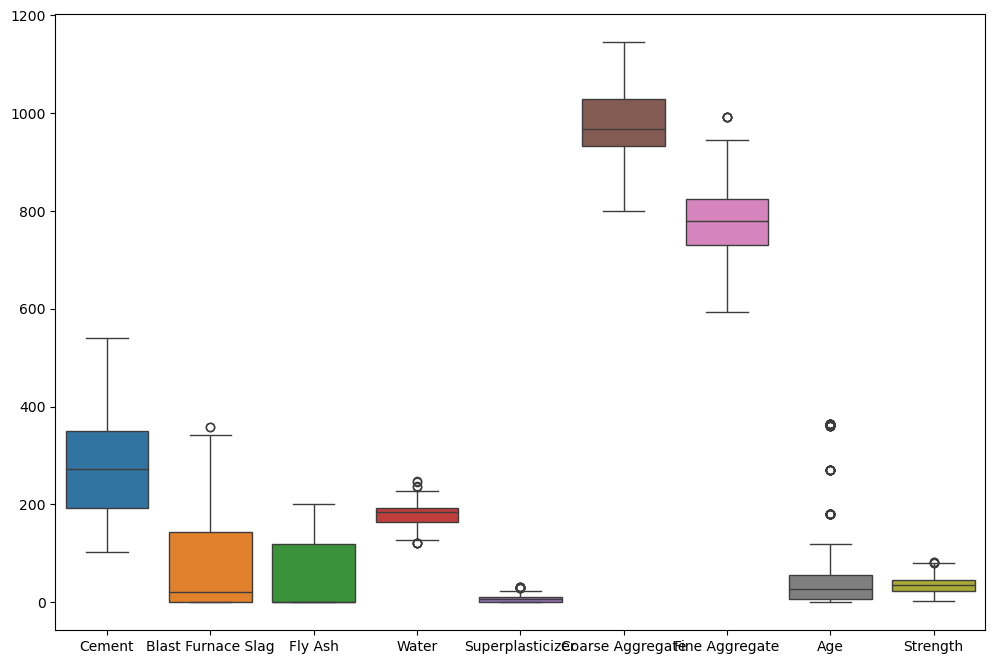

In [13]:
plt.figure(figsize=(12,8))
sns.boxplot(df)
plt.xticks()

In [14]:
df["Age"].max()

365

In [15]:
df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength'],
      dtype='object')

In [16]:
cols=[ 'Blast Furnace Slag', 'Water', 'Superplasticizer',
        'Fine Aggregate', ]

In [17]:
cols

['Blast Furnace Slag', 'Water', 'Superplasticizer', 'Fine Aggregate']

In [18]:
for c in cols:
    print(c)

Blast Furnace Slag
Water
Superplasticizer
Fine Aggregate


In [19]:
for c in cols:
    q1=df[c].quantile(0.25)
    q3=df[c].quantile(0.75)
    iqr=q3-q1
    lower=q1-(1.5*iqr)
    upper=q3+(1.5*iqr)
    df[c]= df[c].map(lambda x:lower if x < lower else upper if x > upper else x )

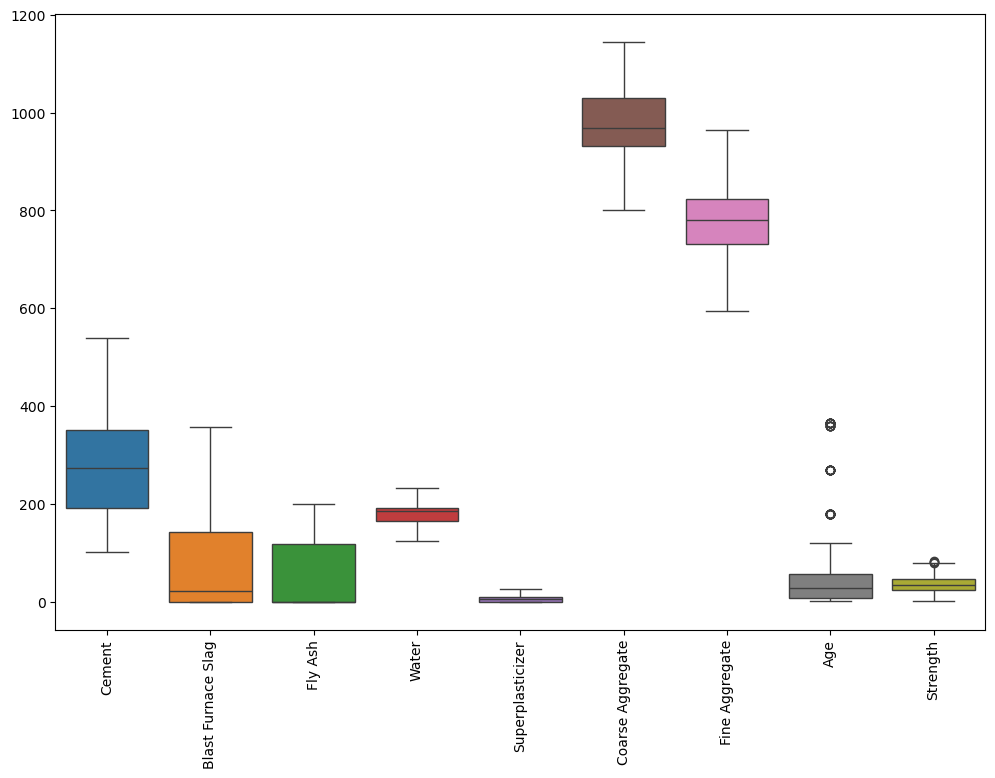

In [20]:
plt.figure(figsize=(12,8))
sns.boxplot(df)
plt.xticks(rotation=90)
plt.show()

In [21]:
q1_age=df["Age"].quantile(0.25)

In [22]:
q3_age=df["Age"].quantile(0.75)

In [23]:
iqr_age=q3_age-q1_age

In [24]:
lower_age=q1_age-(1.5*iqr_age)
upper_age=q3_age+(1.5*iqr_age)

In [25]:
lower_age

np.float64(-66.5)

In [26]:
upper_age

np.float64(129.5)

In [27]:
df[df["Age"]< lower_age]

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength


In [28]:
df[df["Age"]> upper_age]

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
12,427.5,47.5,0.0,228.0,0.0,932.0,594.0,270,43.01
17,342.0,38.0,0.0,228.0,0.0,932.0,670.0,365,56.14
19,475.0,0.0,0.0,228.0,0.0,932.0,594.0,180,42.62
20,427.5,47.5,0.0,228.0,0.0,932.0,594.0,180,41.84
23,139.6,209.4,0.0,192.0,0.0,1047.0,806.9,180,44.21
24,380.0,0.0,0.0,228.0,0.0,932.0,670.0,365,52.52


In [29]:
df[df["Age"]> upper_age].count()

Cement                59
Blast Furnace Slag    59
Fly Ash               59
Water                 59
Superplasticizer      59
Coarse Aggregate      59
Fine Aggregate        59
Age                   59
Strength              59
dtype: int64

In [30]:
df["Age"]=df["Age"].map(lambda x: lower_age if x < lower_age else upper_age if x > upper_age else x)

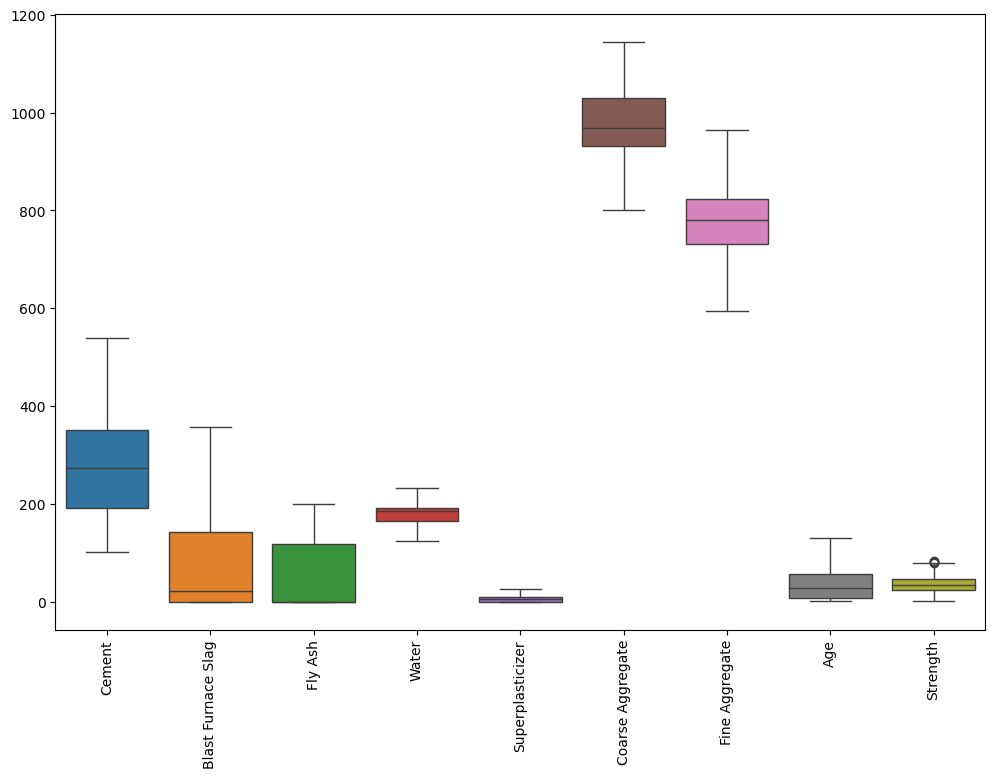

In [31]:
plt.figure(figsize=(12,8))
sns.boxplot(df)
plt.xticks(rotation=90)
plt.show()

# Data Seperation

In [32]:
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,129.5,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,129.5,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,129.5,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28.0,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28.0,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28.0,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28.0,32.77


In [33]:
df.drop("Strength",axis=1)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,129.5
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,129.5
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,129.5
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28.0
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28.0
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28.0
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28.0


In [34]:
X=df.drop("Strength",axis=1)

In [35]:
X

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,129.5
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,129.5
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,129.5
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28.0
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28.0
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28.0
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28.0


In [36]:
y=df["Strength"]

In [37]:
y

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: Strength, Length: 1030, dtype: float64

# Data Splitting

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [40]:
X.shape

(1030, 8)

In [41]:
X_train.shape

(824, 8)

In [42]:
X_test.shape

(206, 8)

# scaling

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
ss=StandardScaler()

In [45]:
ss

StandardScaler()

In [46]:
ss.fit(X_train)

StandardScaler()

In [47]:
X_train_ss=ss.transform(X_train)

In [48]:
X_test_ss=ss.transform(X_test)

In [49]:
X_train_ss

array([[-1.16087734,  0.85760247,  0.9824489 , ..., -0.25746155,
        -0.64866051, -0.27964442],
       [ 1.30862304, -0.60254668,  1.23259821, ..., -1.92694961,
        -0.27261827, -0.27964442],
       [-0.0768653 , -0.85568522,  1.06687429, ...,  1.01785948,
         0.06867419, -0.98804026],
       ...,
       [-0.86591441, -0.85568522,  1.12628475, ...,  1.34082214,
         0.33426177,  1.76053561],
       [ 1.78316909,  0.51126292, -0.83113361, ..., -1.54422615,
         0.11831673, -0.27964442],
       [ 0.28509237, -0.85568522,  0.9355459 , ..., -0.6172979 ,
         0.13693268, -0.27964442]])

In [50]:
X_test_ss

array([[-0.1615392 ,  0.45603269, -0.83113361, ..., -0.52829244,
        -1.26546906,  2.59644271],
       [ 0.73730683,  1.319005  , -0.83113361, ..., -0.36681111,
        -0.20063659, -0.87469693],
       [ 0.99132853,  1.319005  , -0.83113361, ..., -0.36681111,
        -0.20063659, -0.27964442],
       ...,
       [ 0.02734873,  1.45592994, -0.83113361, ...,  0.39482129,
         0.39383282, -0.87469693],
       [ 1.30862304, -0.60254668,  1.23259821, ..., -1.92694961,
        -0.27261827,  0.51375893],
       [ 0.51771297, -0.85568522, -0.83113361, ..., -0.07055009,
         0.11211141,  1.47717727]])

In [51]:
X_train.shape

(824, 8)

In [52]:
X_train.shape[1]

8

# Model Building

In [53]:
import warnings
warnings.filterwarnings("ignore")

In [54]:
from tensorflow.keras.models import Sequential

In [55]:
from tensorflow.keras.layers import Dense

In [56]:
smodel=Sequential()

In [57]:
smodel.add(Dense(64,activation="relu",input_shape=(X_train.shape[1],)))

In [58]:
smodel.add(Dense(32,activation="relu"))

In [59]:
smodel.add(Dense(1))

In [60]:
smodel.compile(optimizer="adam",loss="mean_squared_error")

In [61]:
smodel.fit(X_train_ss,y_train,epochs=30,validation_split=0.2,verbose=0)

In [62]:
smodel.evaluate(X_test_ss,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 96.9045  


96.9045181274414

In [63]:
np.sqrt(100.6558 )

np.float64(10.03273641635222)